In [2]:
# Visualize any Gaussian activity

In [3]:
from __future__ import print_function
import numpy as np

In [7]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import cm

In [8]:
# scale of the heat maps
X1 = np.arange(-8,8.1, 0.1)
X2 = np.arange(-8,8.1, 0.1)
X1s, X2s = np.meshgrid(X1,X2)
inputs_heatmap = np.reshape(zip(X1s.flatten(),X2s.flatten()),(-1,2))
print("shape of heatmap", np.shape(inputs_heatmap))
# print(inputs_heatmap)

shape of heatmap (25921, 2)


0
(25921,)
(25921,)


<IPython.core.display.Javascript object>


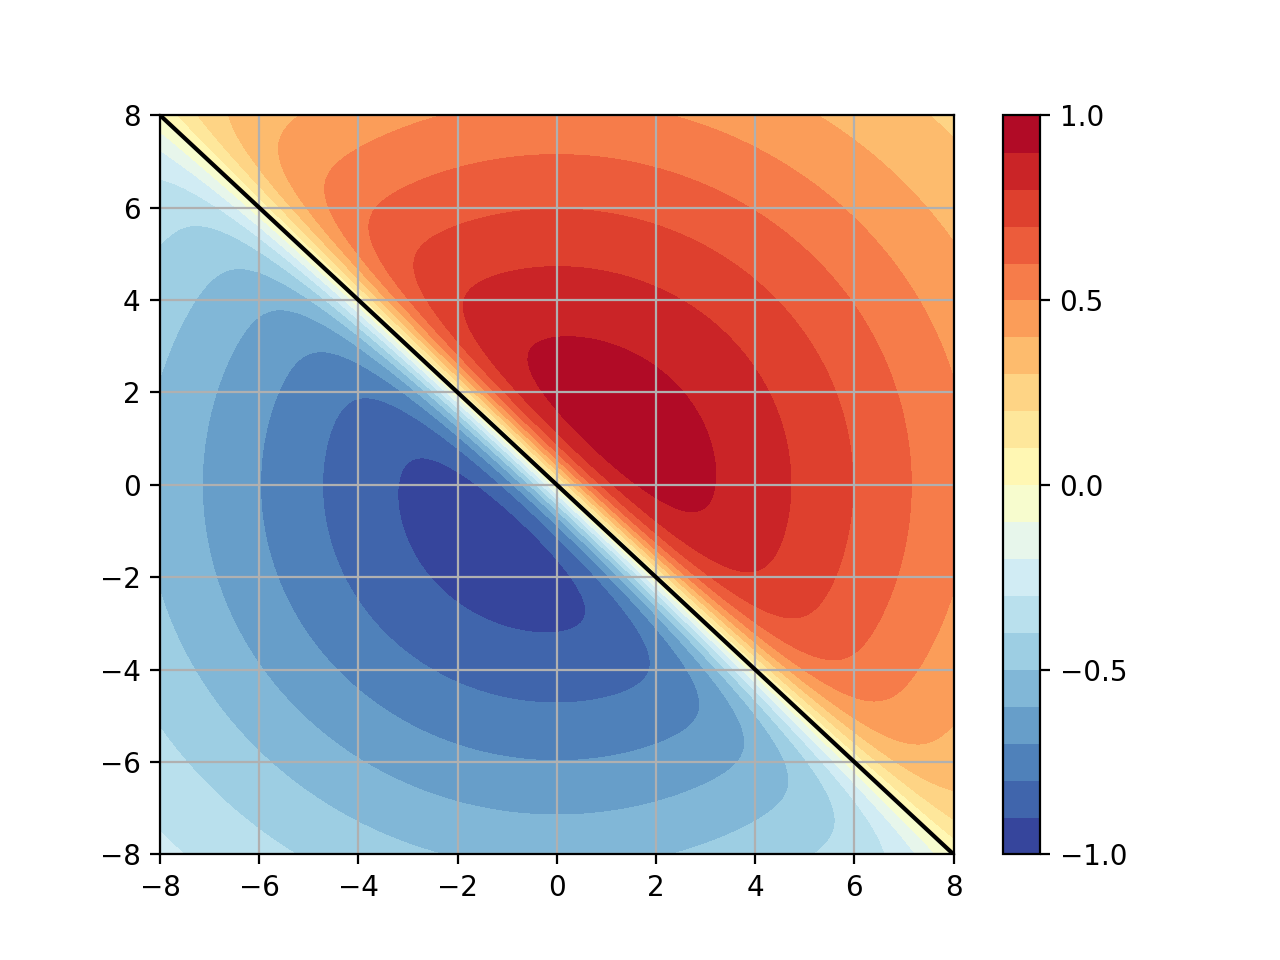

In [9]:
# combining circular gaussian with normal neuron
# neuron parameters (weights, bias)
W = [1,1]
# b = 0 # bias defined by by the center of radial function

# radial parameters
center = [0, 0] # controls the center of gaussian (<=> bias of neuron)
sig = 10 # controls the size of the gaussian
b = -np.matmul(W,center)
print(b)
# new zero line
zero_line = -(W[0]*X1+b)/W[1]

# heatmap neuronal activity
n_activity = np.sum(W*inputs_heatmap, axis=1)+b
print(n_activity.shape)

# heatmap radial activity 

r_activity = np.exp((-1.0/sig**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
print(r_activity.shape)

# overall heatmap activity
activity = n_activity*r_activity

# TEST: activity of tanh(lin)*gaussian

activity = np.tanh(n_activity)*r_activity

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = levels[::5]


plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()